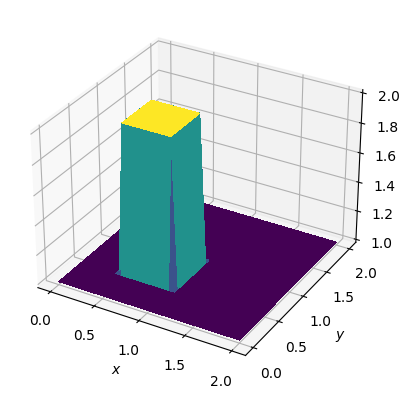

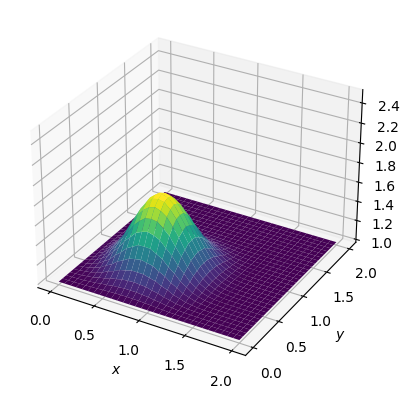

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Discretization variables
nx = 31
ny = 31
nt = 17
nu = 0.05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.25
dt = sigma * dx * dy / nu

# Initialize grid and solution arrays
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
un = np.ones((ny, nx))

# Set hat function I.C.: u(.5 <= x <= 1 && .5 <= y <= 1) = 2
u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2

# Plot initial condition
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0, antialiased=False)



ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Solver
for n in range(nt + 1):
    un = u.copy()
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] +
                     nu * dt / dx**2 *
                     (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                     nu * dt / dy**2 *
                     (un[2:, 1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

# Plot final result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, u[:], rstride=1, cstride=1, cmap='viridis',
                       linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()
